# Titanic: Machine Learning from Disaster

In this program, the famous titanic competetion from kaggle is used.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns

### Loading the data

The dataset is first loaded to understand basic insights about the data 

In [110]:
data = pd.read_csv('all/train.csv')
test_data = pd.read_csv('all/test.csv')

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [17]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [30]:
data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


### Visualizing the data

Next step is to plot the data and finding some insights

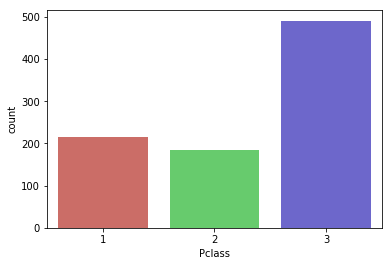

In [24]:
sns.countplot(x='Pclass', data=data, palette='hls')
plt.show()

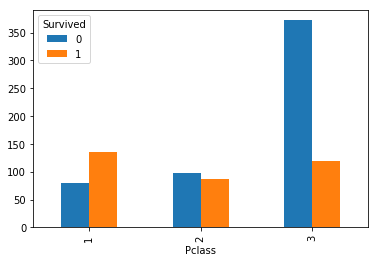

In [29]:
pd.crosstab(data['Pclass'],data['Survived']).plot(kind='bar')
plt.show()

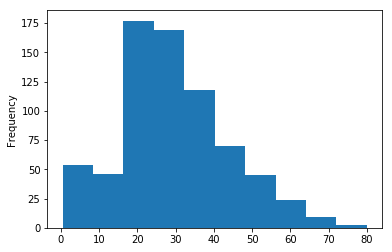

In [35]:
data['Age'].plot.hist()
plt.show()

### Cleaning the data

As it is observed that some values are missing, some are in strings and some features are not needed, cleaning the data is mandatory

In [9]:
headers = list(data)

In [119]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [120]:
features = data[['Sex', 'Pclass', 'Age', 'Survived']]

In [121]:
features.head()

,Sex,Pclass,Age,Survived
0,1,3,22.0,0
1,0,1,38.0,1
2,0,3,26.0,1
3,0,1,35.0,1
4,1,3,35.0,0


In [95]:
features.isnull().any()

Age          True
Pclass      False
Sex         False
Survived    False
dtype: bool

In [82]:
clean_features = features[features['Age'].notnull()]

In [85]:
clean_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Pclass      714 non-null int64
Sex         714 non-null int64
Survived    714 non-null int64
dtypes: float64(1), int64(3)
memory usage: 27.9 KB


In [102]:
np.isnan(clean_features).any()

Age         False
Pclass      False
Sex         False
Survived    False
dtype: bool

In [149]:
X = clean_features[['Age', 'Pclass', 'Sex']]

In [150]:
Y = clean_features['Survived']

In [151]:
X.head()

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1


In [152]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Training the model with the cleaned data

Now, we can train various model with the cleaned data and compare those results

In [134]:
logreg = LogisticRegression()

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [155]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [158]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0])

### Testing the model

Evaluate the model with test data 

In [160]:
confusion_matrix(y_test, y_pred)

array([[110,  15],
       [ 26,  64]])

In [161]:
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       0.81      0.88      0.84       125\n          1       0.81      0.71      0.76        90\n\navg / total       0.81      0.81      0.81       215\n'

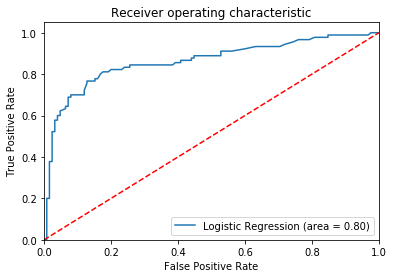

In [166]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusion

So, from the analysis the following observations were made.